In [10]:
# Libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn.cluster import KMeans

### Task 1.
In this exercise, you have to work with a data of past and current employees of a company.
Your task is to build a classiffcation model to predict which employee will leave the company and which
will continue working (the target column is 'left'). As the first step, transform
all the categorical columns into numeric (columns 'department' and 'salary'). Build a logistic regression
model by first create a training set and test set, with test size = 0.20 (set random state to be 0), and
after building a model, evaluate predictions for both the test and training sets. In particular check the
difference of accuracy for the training and test; do you see a result that you would expect there? Second,
perform cross-validation with cv = 5 and scoring = 'accuracy'. What is the minimum and maximum score
you observe after building the models?

In [11]:
# Loading data

hr_data = pd.read_csv('./2/Data for practice exercises/HR_data.csv')
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
# Transform categorical variables
hr_data = pd.get_dummies(hr_data, columns=['Department', 'salary'], drop_first=True)

hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [13]:
# Create training and test data

X_train, X_test, y_train, y_test = train_test_split(hr_data.drop(['left'], axis=1), hr_data.left, test_size=0.2, random_state=0)

# Build model

logistic_regression = LogisticRegression(solver = 'lbfgs')
#max_iter = 1000

model_1 = logistic_regression.fit(X_train, y_train)

# Predict for train and test set

y_train_predict = logistic_regression.predict(X_train)
y_test_predict = logistic_regression.predict(X_test)

# Print results
# Results are almost identical for training and test set

print(metrics.classification_report(y_train, y_train_predict))

print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      9129
           1       0.63      0.40      0.49      2870

    accuracy                           0.80     11999
   macro avg       0.73      0.66      0.68     11999
weighted avg       0.78      0.80      0.78     11999

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2299
           1       0.62      0.39      0.48       701

    accuracy                           0.80      3000
   macro avg       0.72      0.66      0.68      3000
weighted avg       0.78      0.80      0.78      3000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# Perform cross-validation

X, y = hr_data.drop(['left'], axis=1), hr_data.left

model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
scores = cross_val_score(model, X, y, cv=5, scoring = 'accuracy')
scores

array([0.796     , 0.79333333, 0.805     , 0.79266667, 0.6558853 ])

### Task 2.
In this exercise you have to work with the data in the file 'ItalianWineSamples.csv', that
contains 13 chemical measurements on 178 Italian wine samples. Your task is to perform K-Means
clustering to the dataset; in the model building process, do not use the column 'Type'. After scaling the
variables, determine the optimal number of clusters using the elbow-method introduced in the course, and
then perform the K-Means analysis using the optimal cluster number you determined (set random state
= 0). Based on the results, answer the following questions:

- How many observations are there in each cluster?
- What is the average of each variable in each cluster (the original, not the scaled variables)?
- Can you identify some variables that clearly have different average values for each cluster?
- Compare your K-Means Clustering solution with the 'Type' variable, which describes the wine varietal each wine sample belongs to out of three possible types. If you consider the created clusters, do any of them correspond to one of the categories in Type (i.e., most of the wines belonging to the cluster have the same Type), or are the clusters just a mix of all the categories in Type?

In [15]:
# Load data
wine_samples = pd.read_csv('./2/Data for practice exercises/ItalianWineSamples.csv')
wine_samples.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [16]:
# Data for clustering
wine_clust = wine_samples.drop('Type',axis=1)

# Scale data
wine_clust = wine_clust.apply(lambda x: preprocessing.scale(x))

In [17]:
# Determine the optimal number of clusters
sse_clust = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(wine_clust)
    sse_clust.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


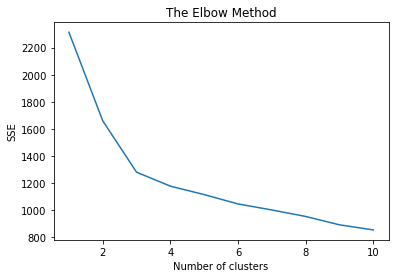

In [18]:
# Based on the plot, 3 clusters seems reasonable

plt.plot(range(1, 11), sse_clust)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [19]:
# Creating model with three clusters

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)

y_clust = kmeans.fit_predict(wine_clust)

y_clust

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [20]:
# Number of observations in clusters
pd.Series(y_clust).value_counts()

1    66
2    61
0    51
dtype: int64

In [21]:
# Variable means for clusters

wine_samples.groupby(y_clust).mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,2.000000,12.240455,1.899697,2.246364,20.190909,93.136364,2.261818,2.095909,0.359394,1.627879,3.018939,1.060697,2.816818,509.484848
2,1.032787,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344


In [22]:
# As we can see, clustering almost perfectly identified the different types of wines, there are only some misclassifications in 
# Type 2

pd.crosstab(wine_samples.Type, y_clust)

col_0,0,1,2
Type,,,
1,0,0,59
2,3,66,2
3,48,0,0
